In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the muesli_orders.csv file and examine it
df= pd.read_csv('../data/muesli_orders.csv', header= 1, parse_dates= ['Order Date'])

C:\Users\MarinaBishay\AppData\Local\Temp\ipykernel_28864\3907129519.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df= pd.read_csv('../data/muesli_orders.csv', header= 1, parse_dates= ['Order Date'])


In [3]:
df.columns

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
#Change the column name to facilitate further analysis (make everything lowercase and use undescore to seperate words)
df.columns= ['index', 'order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name', 'orign_channel', 'country', 'city', 'state', 'postal_code', 'region', 'category', 'sub_category', 'product_id', 'sales', 'quantity', 'discount', 'profit']

In [5]:
#Make sure that there are no duplicate orders or missing values in the data

df.isnull().sum()


index             0
order_id          0
order_date        0
ship_mode         0
customer_id       0
customer_name     0
orign_channel     0
country           0
city              0
state             0
postal_code      11
region            0
category          0
sub_category      0
product_id        0
sales             0
quantity          0
discount          0
profit            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().drop

<bound method DataFrame.drop of       index  order_id  order_date  ship_mode  customer_id  customer_name  \
0     False     False       False      False        False          False   
1     False     False       False      False        False          False   
2     False     False       False      False        False          False   
3     False     False       False      False        False          False   
4     False     False       False      False        False          False   
...     ...       ...         ...        ...          ...            ...   
9989  False     False       False      False        False          False   
9990  False     False       False      False        False          False   
9991  False     False       False      False        False          False   
9992  False     False       False      False        False          False   
9993  False     False       False      False        False          False   

      orign_channel  country   city  state  postal_code

In [8]:
df.dropna(inplace = True)

In [9]:
#Extract features like month, day, etc. from the Order Date datetime column into their own columns.
df['month'] = df['order_date'].dt.month
df['weekday'] = df['order_date'].dt.weekday
df['day'] = df['order_date'].dt.day

df['year'] = df['order_date'].dt.year
df


,index,order_id,order_date,ship_mode,customer_id,customer_name,orign_channel,country,city,state,...,sub_category,product_id,sales,quantity,discount,profit,month,weekday,day,year
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,1,2,16,2019
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,3,0,11,2019
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,6,3,20,2019
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,6,0,17,2019
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,...,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,11,5,24,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,...,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,7,3,25,2019
9990,9908,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,...,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,9,3,13,2018
9991,9913,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,...,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,10,2,10,2018
9992,9920,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,...,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310,3,4,15,2019


Text(0, 0.5, 'Number of orders')

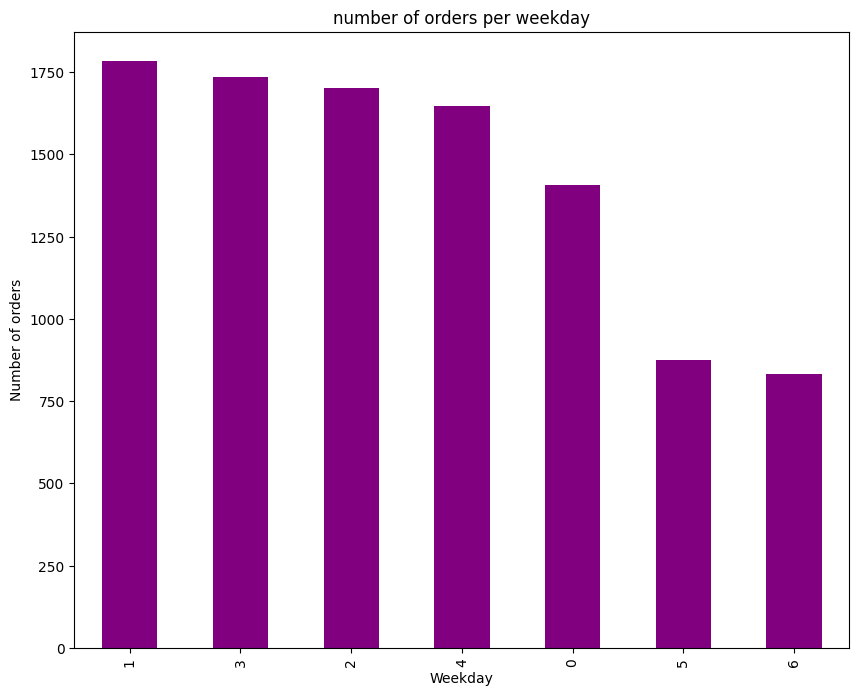

In [10]:
#Plot the number of orders per weekday
orders_weekday= df['weekday'].value_counts()
orders_weekday.plot(kind= 'bar', figsize=(10,8), color='purple')
plt.title('number of orders per weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of orders')

In [11]:
df.to_csv('../data/muesli_orders_cleaned.csv')

In [12]:
#Merge all datasets together:

In [13]:
df_muesli_process = pd.read_csv('../data/muesli_order_process_data.csv', parse_dates= ['On Truck Scan Date'])
df_muesli_process

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
...,...,...,...,...,...
5894,908,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5895,909,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5896,1297,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing
5897,1298,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing


In [14]:
df_muesli_process.columns = ['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode']

In [15]:
df_muesli_intern = pd.read_csv('../data/muesli_Intern_data_study.csv', parse_dates = ['Ready to Ship Date'])
df_muesli_intern

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019
...,...,...,...
285,CA-2020-105333,04/12/2020,07/12/2020
286,CA-2020-105333,04/12/2020,07/12/2020
287,US-2020-110576,04/12/2020,07/12/2020
288,CA-2020-119305,04/12/2020,07/12/2020


In [16]:

df_muesli_process.columns = ['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode']
df_muesli_intern.columns = ['order_id', 'ready_to_ship_date', 'pickup_date']
df_muesli_intern

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019
...,...,...,...
285,CA-2020-105333,04/12/2020,07/12/2020
286,CA-2020-105333,04/12/2020,07/12/2020
287,US-2020-110576,04/12/2020,07/12/2020
288,CA-2020-119305,04/12/2020,07/12/2020


In [39]:
df_muesli_camp = pd.read_csv('../data/muesli_campaign_data.csv', parse_dates=  ['Arrival Scan Date'] )

df_muesli_camp

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly
...,...,...,...
328,CA-2020-129707,08/05/2020,Larry Hughes
329,CA-2020-125381,08/05/2020,Speros Goranitis
330,CA-2020-141733,15/05/2020,Rick Wilson
331,US-2020-104451,15/05/2020,Michelle Moray


In [18]:
df_muesli_camp.columns = ['order_id', 'arrival_scan_date', 'customer_name']
df_muesli_camp

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly
...,...,...,...
328,CA-2020-129707,08/05/2020,Larry Hughes
329,CA-2020-125381,08/05/2020,Speros Goranitis
330,CA-2020-141733,15/05/2020,Rick Wilson
331,US-2020-104451,15/05/2020,Michelle Moray


In [19]:
df_muesli_process.set_index('order_id', inplace = True)
df_muesli_process

,row_id,order_date,on_truck_scan_date,ship_mode
order_id,,,,
CA-2019-125206,3074,3/1/2019,07/01/2019,Express
CA-2019-160304,4919,2/1/2019,09/01/2019,Standard Processing
CA-2019-160304,4920,2/1/2019,09/01/2019,Standard Processing
US-2019-116365,8604,3/1/2019,09/01/2019,Standard Processing
US-2019-116365,8605,3/1/2019,09/01/2019,Standard Processing
...,...,...,...,...
CA-2020-143259,908,30/12/2020,06/01/2021,Standard Processing
CA-2020-143259,909,30/12/2020,06/01/2021,Standard Processing
CA-2020-115427,1297,30/12/2020,06/01/2021,Standard Processing


In [20]:
df.set_index('order_id', inplace=True)

In [21]:
df_muesli_merge = df.merge(df_muesli_process, on = 'order_id', how = 'outer', )
df_muesli_merge

,index,order_date_x,ship_mode_x,customer_id,customer_name,orign_channel,country,city,state,postal_code,...,discount,profit,month,weekday,day,year,row_id,order_date_y,on_truck_scan_date,ship_mode_y
order_id,,,,,,,,,,,,,,,,,,,,,
CA-2019-121755,27.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,0.0,11.7741,1.0,2.0,16.0,2019.0,26.0,16/1/2019,23/01/2019,Standard Processing
CA-2019-121755,27.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,0.0,11.7741,1.0,2.0,16.0,2019.0,27.0,16/1/2019,23/01/2019,Standard Processing
CA-2019-121755,26.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,0.2,4.2224,1.0,2.0,16.0,2019.0,26.0,16/1/2019,23/01/2019,Standard Processing
CA-2019-121755,26.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,0.2,4.2224,1.0,2.0,16.0,2019.0,27.0,16/1/2019,23/01/2019,Standard Processing
CA-2019-118255,45.0,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,0.0,19.7714,3.0,0.0,11.0,2019.0,45.0,11/3/2019,13/03/2019,Express
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9387.0,19/1/2020,27/01/2020,Standard Processing
US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9388.0,19/1/2020,27/01/2020,Standard Processing
US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9389.0,19/1/2020,27/01/2020,Standard Processing


In [22]:
df_muesli_merge_2 = pd.merge(df_muesli_camp, df_muesli_intern, on = 'order_id', how = 'outer', )
df_muesli_merge_2

,order_id,arrival_scan_date,customer_name,ready_to_ship_date,pickup_date
0,CA-2019-109666,03/05/2019,Kunst Miller,NaN,NaN
1,CA-2019-138933,03/05/2019,Jack Lebron,NaN,NaN
2,CA-2019-130001,03/05/2019,Heather Kirkland,NaN,NaN
3,CA-2019-113061,06/05/2019,Ed Ludwig,NaN,NaN
4,CA-2019-162138,06/05/2019,Grace Kelly,NaN,NaN
...,...,...,...,...,...
596,US-2020-110576,NaN,NaN,04/12/2020,07/12/2020
597,CA-2020-105333,NaN,NaN,04/12/2020,07/12/2020
598,CA-2020-105333,NaN,NaN,04/12/2020,07/12/2020
599,CA-2020-119305,NaN,NaN,04/12/2020,07/12/2020


In [23]:
df_muesli_merge_final =  pd.merge(df_muesli_merge,df_muesli_merge_2,on = 'order_id', how = 'outer')
df_muesli_merge_final

,order_id,index,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,...,day,year,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date
0,CA-2019-121755,27.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,16.0,2019.0,26.0,16/1/2019,23/01/2019,Standard Processing,NaN,NaN,NaN,NaN
1,CA-2019-121755,27.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,16.0,2019.0,27.0,16/1/2019,23/01/2019,Standard Processing,NaN,NaN,NaN,NaN
2,CA-2019-121755,26.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,16.0,2019.0,26.0,16/1/2019,23/01/2019,Standard Processing,NaN,NaN,NaN,NaN
3,CA-2019-121755,26.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,16.0,2019.0,27.0,16/1/2019,23/01/2019,Standard Processing,NaN,NaN,NaN,NaN
4,CA-2019-118255,45.0,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,11.0,2019.0,45.0,11/3/2019,13/03/2019,Express,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23146,US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9387.0,19/1/2020,27/01/2020,Standard Processing,NaN,NaN,NaN,NaN
23147,US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9388.0,19/1/2020,27/01/2020,Standard Processing,NaN,NaN,NaN,NaN
23148,US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9389.0,19/1/2020,27/01/2020,Standard Processing,NaN,NaN,NaN,NaN
23149,US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9390.0,19/1/2020,27/01/2020,Standard Processing,NaN,NaN,NaN,NaN


In [24]:

df_muesli_merge_final.duplicated('order_id').sum()

18144

In [25]:
df_muesli_merge_final.drop_duplicates('order_id', inplace=True)

In [26]:
df_muesli_merge_final

,order_id,index,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,...,day,year,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date
0,CA-2019-121755,27.0,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,...,16.0,2019.0,26.0,16/1/2019,23/01/2019,Standard Processing,NaN,NaN,NaN,NaN
4,CA-2019-118255,45.0,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,...,11.0,2019.0,45.0,11/3/2019,13/03/2019,Express,NaN,NaN,NaN,NaN
8,CA-2019-169194,48.0,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,...,20.0,2019.0,48.0,20/6/2019,26/06/2019,Standard Processing,NaN,NaN,NaN,NaN
12,CA-2019-111682,60.0,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,...,17.0,2019.0,56.0,17/6/2019,19/06/2019,Express,NaN,NaN,NaN,NaN
61,CA-2018-135545,63.0,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,...,24.0,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,CA-2019-122581,9880.0,2019-08-21,Standard Class,JK-15370,Jay Kimmel,Email,United States,New York City,New York,...,21.0,2019.0,9880.0,21/8/2019,28/08/2019,Standard Processing,NaN,NaN,NaN,NaN
23142,US-2019-165505,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9147.0,23/1/2019,30/01/2019,Standard Processing,NaN,NaN,NaN,NaN
23145,US-2019-150140,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8799.0,6/4/2019,15/04/2019,Standard Processing,NaN,NaN,NaN,NaN
23146,US-2020-127292,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9387.0,19/1/2020,27/01/2020,Standard Processing,NaN,NaN,NaN,NaN


In [27]:
column_to_exclude = ['index'] 

df_muesli_merge_final.drop(columns=column_to_exclude, inplace=True)

In [28]:
df_muesli_merge_final

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,postal_code,...,day,year,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,16.0,2019.0,26.0,16/1/2019,23/01/2019,Standard Processing,NaN,NaN,NaN,NaN
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,11.0,2019.0,45.0,11/3/2019,13/03/2019,Express,NaN,NaN,NaN,NaN
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,20.0,2019.0,48.0,20/6/2019,26/06/2019,Standard Processing,NaN,NaN,NaN,NaN
12,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,17.0,2019.0,56.0,17/6/2019,19/06/2019,Express,NaN,NaN,NaN,NaN
61,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,24.0,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,CA-2019-122581,2019-08-21,Standard Class,JK-15370,Jay Kimmel,Email,United States,New York City,New York,10035.0,...,21.0,2019.0,9880.0,21/8/2019,28/08/2019,Standard Processing,NaN,NaN,NaN,NaN
23142,US-2019-165505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9147.0,23/1/2019,30/01/2019,Standard Processing,NaN,NaN,NaN,NaN
23145,US-2019-150140,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8799.0,6/4/2019,15/04/2019,Standard Processing,NaN,NaN,NaN,NaN
23146,US-2020-127292,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9387.0,19/1/2020,27/01/2020,Standard Processing,NaN,NaN,NaN,NaN


In [29]:
df_muesli_merge_final['order_date_x'] = pd.to_datetime(df_muesli_merge_final['order_date_x'])
df_muesli_merge_final['order_date_y'] = pd.to_datetime(df_muesli_merge_final['order_date_y'])

C:\Users\MarinaBishay\AppData\Local\Temp\ipykernel_28864\326422180.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_muesli_merge_final['order_date_y'] = pd.to_datetime(df_muesli_merge_final['order_date_y'])


In [30]:
# Create 3 KPI for delivery processes as columns:

# Order To Truck Time (order date - on truck scan date)
# Processing time (order date - ready to ship date)
# Waiting time (ready to ship date - on truck scan date)


df_muesli_merge_final['order_date_x'] = pd.to_datetime(df_muesli_merge_final['order_date_x'], dayfirst = True)
df_muesli_merge_final['on_truck_scan_date'] = pd.to_datetime(df_muesli_merge_final['on_truck_scan_date'], dayfirst = True)
df_muesli_merge_final['ready_to_ship_date'] = pd.to_datetime(df_muesli_merge_final['ready_to_ship_date'], dayfirst = True)
df_muesli_merge_final['pickup_date'] = pd.to_datetime(df_muesli_merge_final['pickup_date'], dayfirst = True)
df_muesli_merge_final

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,postal_code,...,day,year,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,16.0,2019.0,26.0,2019-01-16,2019-01-23,Standard Processing,NaN,NaN,NaT,NaT
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,11.0,2019.0,45.0,2019-03-11,2019-03-13,Express,NaN,NaN,NaT,NaT
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,20.0,2019.0,48.0,2019-06-20,2019-06-26,Standard Processing,NaN,NaN,NaT,NaT
12,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,17.0,2019.0,56.0,2019-06-17,2019-06-19,Express,NaN,NaN,NaT,NaT
61,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,24.0,2018.0,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,CA-2019-122581,2019-08-21,Standard Class,JK-15370,Jay Kimmel,Email,United States,New York City,New York,10035.0,...,21.0,2019.0,9880.0,2019-08-21,2019-08-28,Standard Processing,NaN,NaN,NaT,NaT
23142,US-2019-165505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9147.0,2019-01-23,2019-01-30,Standard Processing,NaN,NaN,NaT,NaT
23145,US-2019-150140,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8799.0,2019-04-06,2019-04-15,Standard Processing,NaN,NaN,NaT,NaT
23146,US-2020-127292,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9387.0,2020-01-19,2020-01-27,Standard Processing,NaN,NaN,NaT,NaT


In [31]:
df_muesli_merge_final['order_to_truck_time'] = (df_muesli_merge_final['on_truck_scan_date'] - df_muesli_merge_final['order_date_x']).dt.days
df_muesli_merge_final['processing_time'] = (df_muesli_merge_final['ready_to_ship_date'] - df_muesli_merge_final['order_date_x']).dt.days
df_muesli_merge_final['waiting_time'] = (df_muesli_merge_final['on_truck_scan_date'] - df_muesli_merge_final['ready_to_ship_date']).dt.days
df_muesli_merge_final

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,postal_code,...,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_to_truck_time,processing_time,waiting_time
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,2019-01-16,2019-01-23,Standard Processing,NaN,NaN,NaT,NaT,7.0,NaN,NaN
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,2019-03-11,2019-03-13,Express,NaN,NaN,NaT,NaT,2.0,NaN,NaN
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,2019-06-20,2019-06-26,Standard Processing,NaN,NaN,NaT,NaT,6.0,NaN,NaN
12,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,2019-06-17,2019-06-19,Express,NaN,NaN,NaT,NaT,2.0,NaN,NaN
61,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,CA-2019-122581,2019-08-21,Standard Class,JK-15370,Jay Kimmel,Email,United States,New York City,New York,10035.0,...,2019-08-21,2019-08-28,Standard Processing,NaN,NaN,NaT,NaT,7.0,NaN,NaN
23142,US-2019-165505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-01-23,2019-01-30,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaN
23145,US-2019-150140,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-04-06,2019-04-15,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaN
23146,US-2020-127292,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-19,2020-01-27,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [41]:
df_muesli_merge_final['order_to_truck_time'] =( df_muesli_merge_final['order_date_x'] - df_muesli_merge_final['on_truck_scan_date']).dt.days
df_muesli_merge_final

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,postal_code,...,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_to_truck_time,processing_time,waiting_time
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,2019-01-16,2019-01-23,Standard Processing,NaN,NaN,NaT,NaT,-7.0,NaT,NaT
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,2019-03-11,2019-03-13,Express,NaN,NaN,NaT,NaT,-2.0,NaT,NaT
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,2019-06-20,2019-06-26,Standard Processing,NaN,NaN,NaT,NaT,-6.0,NaT,NaT
12,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,2019-06-17,2019-06-19,Express,NaN,NaN,NaT,NaT,-2.0,NaT,NaT
61,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,CA-2019-122581,2019-08-21,Standard Class,JK-15370,Jay Kimmel,Email,United States,New York City,New York,10035.0,...,2019-08-21,2019-08-28,Standard Processing,NaN,NaN,NaT,NaT,-7.0,NaT,NaT
23142,US-2019-165505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-01-23,2019-01-30,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaT,NaT
23145,US-2019-150140,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-04-06,2019-04-15,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaT,NaT
23146,US-2020-127292,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-19,2020-01-27,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaT,NaT


In [42]:
# Processing time (order date - ready to ship date)
df_muesli_merge_final['processing_time'] = (df_muesli_merge_final['order_date_x'] - df_muesli_merge_final['ready_to_ship_date']).dt.days
df_muesli_merge_final

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,postal_code,...,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_to_truck_time,processing_time,waiting_time
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,2019-01-16,2019-01-23,Standard Processing,NaN,NaN,NaT,NaT,-7.0,NaN,NaT
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,2019-03-11,2019-03-13,Express,NaN,NaN,NaT,NaT,-2.0,NaN,NaT
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,2019-06-20,2019-06-26,Standard Processing,NaN,NaN,NaT,NaT,-6.0,NaN,NaT
12,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,2019-06-17,2019-06-19,Express,NaN,NaN,NaT,NaT,-2.0,NaN,NaT
61,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,CA-2019-122581,2019-08-21,Standard Class,JK-15370,Jay Kimmel,Email,United States,New York City,New York,10035.0,...,2019-08-21,2019-08-28,Standard Processing,NaN,NaN,NaT,NaT,-7.0,NaN,NaT
23142,US-2019-165505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-01-23,2019-01-30,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaT
23145,US-2019-150140,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-04-06,2019-04-15,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaT
23146,US-2020-127292,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-19,2020-01-27,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaT


In [43]:
# Waiting time (ready to ship date - on truck scan date)
df_muesli_merge_final['waiting_time'] =( df_muesli_merge_final['ready_to_ship_date'] - df_muesli_merge_final['on_truck_scan_date']).dt.days
df_muesli_merge_final

,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,orign_channel,country,city,state,postal_code,...,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_to_truck_time,processing_time,waiting_time
0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,2019-01-16,2019-01-23,Standard Processing,NaN,NaN,NaT,NaT,-7.0,NaN,NaN
4,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,2019-03-11,2019-03-13,Express,NaN,NaN,NaT,NaT,-2.0,NaN,NaN
8,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,2019-06-20,2019-06-26,Standard Processing,NaN,NaN,NaT,NaT,-6.0,NaN,NaN
12,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,2019-06-17,2019-06-19,Express,NaN,NaN,NaT,NaT,-2.0,NaN,NaN
61,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,NaT,NaT,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,CA-2019-122581,2019-08-21,Standard Class,JK-15370,Jay Kimmel,Email,United States,New York City,New York,10035.0,...,2019-08-21,2019-08-28,Standard Processing,NaN,NaN,NaT,NaT,-7.0,NaN,NaN
23142,US-2019-165505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-01-23,2019-01-30,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaN
23145,US-2019-150140,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-04-06,2019-04-15,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaN
23146,US-2020-127292,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-19,2020-01-27,Standard Processing,NaN,NaN,NaT,NaT,NaN,NaN,NaN


Text(0.5, 1.0, 'Order to Truck Time Distribution by Ship Mode')

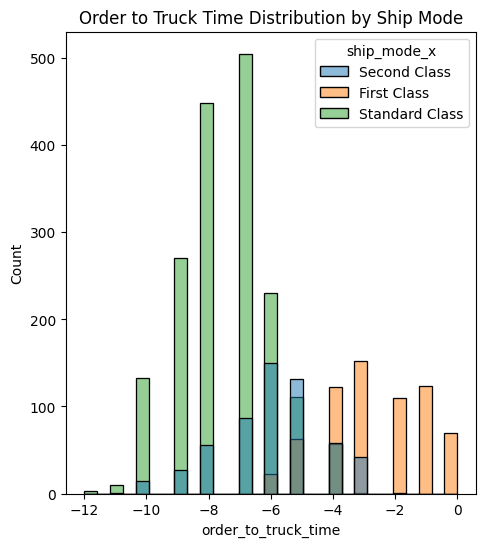

In [44]:
# plot distribution of “order to truck time” split by ship mode
# plot distribution of “processing days” split by ship mode
# plot distribution of “waiting time” split by ship mode
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.histplot(data=df_muesli_merge_final, x='order_to_truck_time', hue='ship_mode_x')
plt.title('Order to Truck Time Distribution by Ship Mode')

Text(0.5, 1.0, 'Processing Days Distribution by Ship Mode')

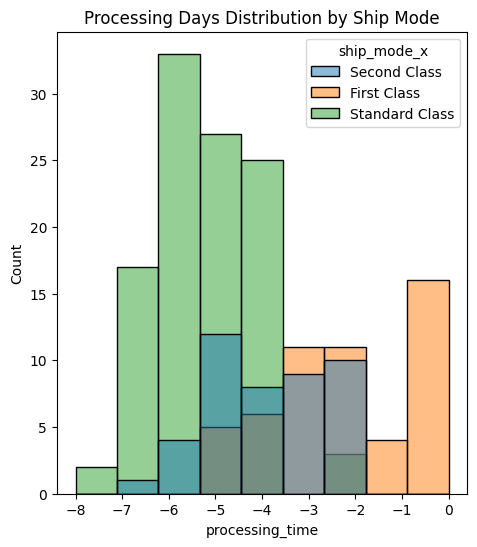

In [46]:

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.histplot(data=df_muesli_merge_final, x='processing_time', hue='ship_mode_x')
plt.title('Processing Days Distribution by Ship Mode')

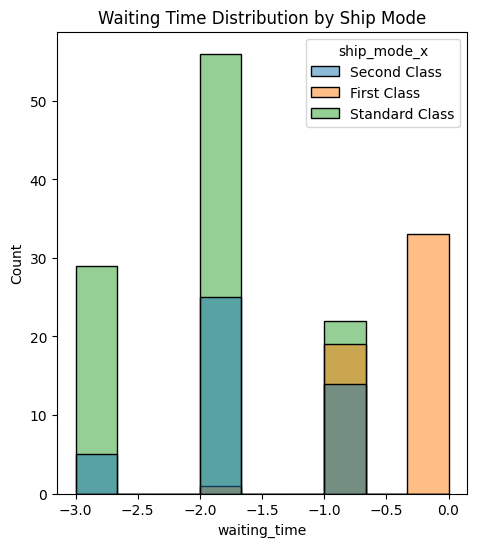

In [50]:

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.histplot(data=df_muesli_merge_final, x='waiting_time', hue='ship_mode_x')
plt.title('Waiting Time Distribution by Ship Mode');

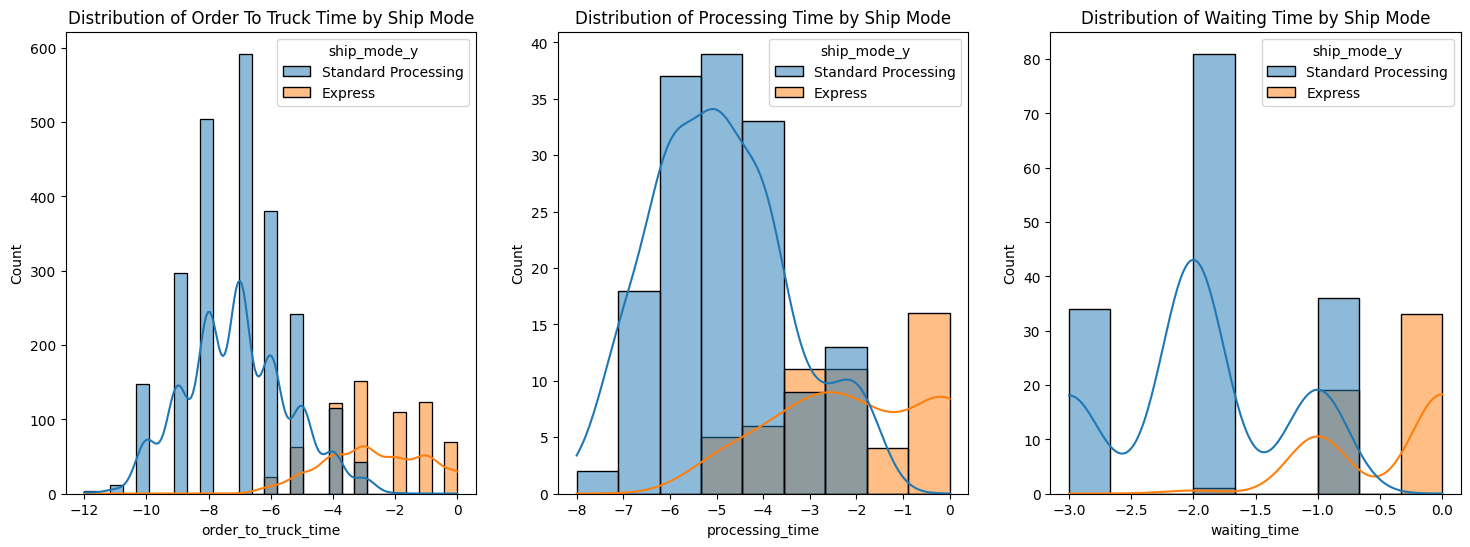

In [52]:
plt.figure(figsize=(18, 6))

# Plot distribution of "Order To Truck Time" split by ship mode
plt.subplot(1, 3, 1)
sns.histplot(data= df_muesli_merge_final, x='order_to_truck_time', hue='ship_mode_y', kde=True)
plt.title('Distribution of Order To Truck Time by Ship Mode')

# Plot distribution of "Processing Time" split by ship mode
plt.subplot(1, 3, 2)
sns.histplot(data=df_muesli_merge_final, x='processing_time', hue='ship_mode_y', kde=True)
plt.title('Distribution of Processing Time by Ship Mode')

# Plot distribution of "Waiting Time" split by ship mode
plt.subplot(1, 3, 3)
sns.histplot(data=df_muesli_merge_final, x='waiting_time', hue='ship_mode_y', kde=True)
plt.title('Distribution of Waiting Time by Ship Mode');

### Confidence Intervals

In [55]:
#For the muesli order data set, calculate the 95% confidence intervals for the mean of the profit feature using bootstrapping.columns_to_drop = ['Unnamed: 0','index']
columns_to_drop = ['index']
df.drop(columns=columns_to_drop, inplace=True)

In [56]:
df

,order_date,ship_mode,customer_id,customer_name,orign_channel,country,city,state,postal_code,region,...,sub_category,product_id,sales,quantity,discount,profit,month,weekday,day,year
order_id,,,,,,,,,,,,,,,,,,,,,
CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,...,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,1,2,16,2019
CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,...,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,3,0,11,2019
CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,...,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,6,3,20,2019
CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,...,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,6,0,17,2019
CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,...,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,11,5,24,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,53209.0,Central,...,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,7,3,25,2019
US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,92804.0,West,...,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,9,3,13,2018
CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,93101.0,West,...,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,10,2,10,2018


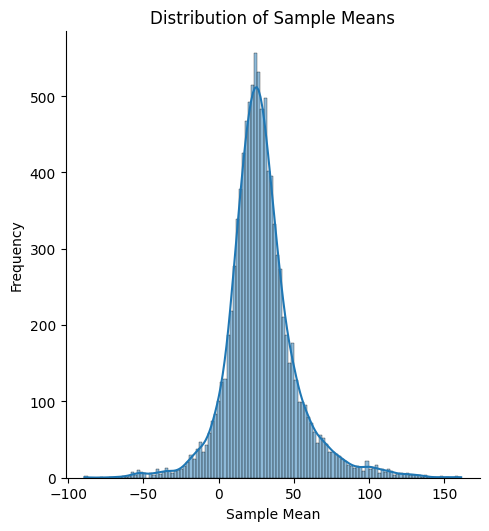

In [58]:

import numpy as np
#1. Initialize an empty list called sample_means
sample_means = []

#2. Create a for loop that will loop 10,000 times
for i in range(10000):
    #3. In each iteration, use the pandas method .sample() to sample 100 profits with replacement
    sample = df['profit'].sample(100, replace=True)
    
    #4.Take the mean of these 100 samples and append it to the sample_means list
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# 5.Using sns.displot, plot the distribution of the sample_means list
sns.displot(sample_means, kde=True)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [59]:
profit = df['profit']

In [60]:
# 6.Convert sample_means list to pandas Series
sample_means_series = pd.Series(sample_means)

In [61]:
#7.Using pandas .quantile(), calculate the upper (0.975) and lower (0.025) limits of the confidence interval
alpha= 0.95
lower_quantile = (1-alpha)/2
upper_quantile= alpha+((1-alpha)/2)

print(alpha,lower_quantile,upper_quantile)

0.95 0.025000000000000022 0.975


In [62]:
lower_limit= sample_means_series.quantile(lower_quantile)
upper_limit = sample_means_series.quantile(upper_quantile)
print(alpha,lower_limit,upper_limit)

0.95 -13.824873924999979 84.67326879999999


In [63]:
sample_means=sample_means_series.mean()
sample_std= sample_means_series.std()
print(sample_means,sample_std)

28.5858722649 23.179585602789814


In [64]:
z=1.96
n=len(profit)
lower_limit_eq=sample_means-((z*sample)/np.sqrt(n))
upper_limit_eq=sample_means-((z*sample)/np.sqrt(n))
print(lower_limit_eq,upper_limit_eq)

order_id
CA-2020-148145    28.168979
CA-2017-154669    26.427002
CA-2019-114405    28.536544
US-2019-157728    28.047700
CA-2019-117121   -68.445491
                    ...    
CA-2018-162621    28.739324
CA-2019-158568    28.797679
CA-2019-113621    27.570709
CA-2018-159534    27.526677
CA-2018-122406    26.938236
Name: profit, Length: 100, dtype: float64 order_id
CA-2020-148145    28.168979
CA-2017-154669    26.427002
CA-2019-114405    28.536544
US-2019-157728    28.047700
CA-2019-117121   -68.445491
                    ...    
CA-2018-162621    28.739324
CA-2019-158568    28.797679
CA-2019-113621    27.570709
CA-2018-159534    27.526677
CA-2018-122406    26.938236
Name: profit, Length: 100, dtype: float64


### A/B Testing

In [69]:
df

,order_date,ship_mode,customer_id,customer_name,orign_channel,country,city,state,postal_code,region,...,sub_category,product_id,sales,quantity,discount,profit,month,weekday,day,year
order_id,,,,,,,,,,,,,,,,,,,,,
CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,...,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,1,2,16,2019
CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,...,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,3,0,11,2019
CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,...,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,6,3,20,2019
CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,...,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,6,0,17,2019
CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,...,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,11,5,24,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,53209.0,Central,...,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,7,3,25,2019
US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,92804.0,West,...,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,9,3,13,2018
CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,93101.0,West,...,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,10,2,10,2018


In [73]:
channel_email = df[df['orign_channel'] == 'Email']
channel_email

,order_date,ship_mode,customer_id,customer_name,orign_channel,country,city,state,postal_code,region,...,sub_category,product_id,sales,quantity,discount,profit,month,weekday,day,year
order_id,,,,,,,,,,,,,,,,,,,,,
CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,...,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,1,2,16,2019
CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,...,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,6,3,20,2019
CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,...,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,6,0,17,2019
CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,...,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,11,5,24,2018
CA-2020-155558,2020-10-26,Standard Class,PG-18895,Paul Gonzalez,Email,United States,Rochester,Minnesota,55901.0,Central,...,Gluten Free,TEC-AC-10001998,19.990,1,0.0,6.7966,10,0,26,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2020-107209,2020-07-27,Second Class,JW-15955,Joni Wasserman,Email,United States,Raleigh,North Carolina,27604.0,South,...,With Nuts,FUR-CH-10001146,194.848,4,0.2,12.1780,7,0,27,2020
US-2017-164406,2017-08-15,Standard Class,BD-11605,Brian Dahlen,Email,United States,San Francisco,California,94122.0,West,...,With Nuts,FUR-CH-10003833,195.136,4,0.2,-12.1960,8,1,15,2017
US-2020-152842,2020-07-16,Standard Class,NF-18385,Natalie Fritzler,Email,United States,Charlotte,North Carolina,28205.0,South,...,With Nuts,FUR-CH-10004218,242.352,3,0.2,15.1470,7,3,16,2020


In [74]:
channel_email['email']=channel_email['sales']
channel_email=channel_email[['email']]
channel_email

C:\Users\MarinaBishay\AppData\Local\Temp\ipykernel_28864\691846823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_email['email']=channel_email['sales']


,email
order_id,
CA-2019-121755,90.570
CA-2019-169194,45.000
CA-2019-111682,30.000
CA-2018-135545,13.980
CA-2020-155558,19.990
...,...
CA-2020-107209,194.848
US-2017-164406,195.136
US-2020-152842,242.352


In [76]:
channel_fb = df[df['orign_channel'] == 'Facebook']
channel_fb

,order_date,ship_mode,customer_id,customer_name,orign_channel,country,city,state,postal_code,region,...,sub_category,product_id,sales,quantity,discount,profit,month,weekday,day,year
order_id,,,,,,,,,,,,,,,,,,,,,
CA-2019-158568,2019-08-29,Standard Class,RB-19465,Rick Bensley,Facebook,United States,Chicago,Illinois,60610.0,Central,...,Gluten Free,TEC-AC-10001767,95.976,3,0.2,-10.7973,8,3,29,2019
CA-2018-129476,2018-10-15,Standard Class,PA-19060,Pete Armstrong,Facebook,United States,Orland Park,Illinois,60462.0,Central,...,Gluten Free,TEC-AC-10000844,339.960,5,0.2,67.9920,10,0,15,2018
CA-2017-158274,2017-11-19,Second Class,RM-19675,Robert Marley,Facebook,United States,Monroe,Louisiana,71203.0,South,...,Gluten Free,TEC-AC-10002345,29.000,2,0.0,7.2500,11,6,19,2017
CA-2017-123260,2017-08-26,Standard Class,FM-14290,Frank Merwin,Facebook,United States,Los Angeles,California,90032.0,West,...,Gluten Free,TEC-AC-10002323,176.800,8,0.0,22.9840,8,5,26,2017
US-2020-100930,2020-04-07,Standard Class,CS-12400,Christopher Schild,Facebook,United States,Tampa,Florida,33614.0,South,...,Gluten Free,TEC-AC-10003832,617.976,3,0.2,-7.7247,4,1,7,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CA-2018-160227,2018-11-02,First Class,ED-13885,Emily Ducich,Facebook,United States,New York City,New York,10011.0,East,...,With Nuts,FUR-CH-10002073,2621.322,11,0.1,553.3902,11,4,2,2018
CA-2020-111388,2020-09-02,First Class,SU-20665,Stephanie Ulpright,Facebook,United States,Seattle,Washington,98103.0,West,...,With Nuts,FUR-CH-10003061,215.976,3,0.2,-2.6997,9,2,2,2020
CA-2020-109085,2020-02-17,First Class,CK-12325,Christine Kargatis,Facebook,United States,Troy,Ohio,45373.0,East,...,With Nuts,FUR-CH-10003981,899.430,5,0.3,-12.8490,2,0,17,2020


In [77]:
channel_fb['Facebook']=channel_fb['sales']
channel_fb=channel_fb[['Facebook']]
channel_fb

C:\Users\MarinaBishay\AppData\Local\Temp\ipykernel_28864\2241563285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_fb['Facebook']=channel_fb['sales']


,Facebook
order_id,
CA-2019-158568,95.976
CA-2018-129476,339.960
CA-2017-158274,29.000
CA-2017-123260,176.800
US-2020-100930,617.976
...,...
CA-2018-160227,2621.322
CA-2020-111388,215.976
CA-2020-109085,899.430


In [79]:

import scipy.stats as sps
test_statistic, pvalue = sps.ttest_ind(channel_fb, channel_email)
print(f'the average sales for channel: {channel_fb.mean()}')
print(f'the average sales for channel: {channel_email.mean()}')
print(test_statistic, pvalue)

the average sales for channel: Facebook    240.380695
dtype: float64
the average sales for channel: email    223.688578
dtype: float64
[0.95970314] [0.33723795]


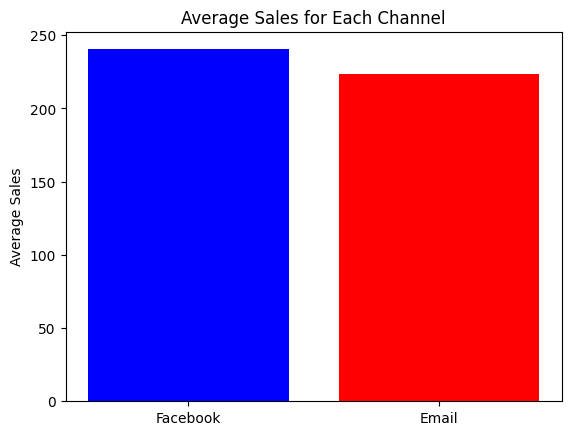

In [81]:
colors = ['Blue', 'Red']

plt.bar(['Facebook', 'Email'], [channel_fb.mean().values[0], channel_email.mean().values[0]], color=colors)
plt.title('Average Sales for Each Channel')
plt.ylabel('Average Sales')
plt.show()

In [82]:
ship_mode_num = {'Second Class': 2, 'Standard Class': 3, 'First Class': 1}

df['ship_mode_numeric'] = df['ship_mode'].map(ship_mode_num)

print(df[['ship_mode', 'ship_mode_numeric']])

                     ship_mode  ship_mode_numeric
order_id                                         
CA-2019-121755    Second Class                  2
CA-2019-118255     First Class                  1
CA-2019-169194  Standard Class                  3
CA-2019-111682     First Class                  1
CA-2018-135545  Standard Class                  3
...                        ...                ...
US-2019-115441    Second Class                  2
US-2018-129007     First Class                  1
CA-2018-132388     First Class                  1
CA-2019-149272  Standard Class                  3
CA-2020-121559    Second Class                  2

[9983 rows x 2 columns]


In [85]:
from scipy.stats import zscore
selected_ship_modes = ['First Class', 'Standard Class']
selected_data = df[df['ship_mode'].isin(selected_ship_modes)]

group_0 = selected_data[selected_data['ship_mode'] == selected_ship_modes[0]]['quantity']
group_1 = selected_data[selected_data['ship_mode'] == selected_ship_modes[1]]['quantity']

test_statistic, pvalue = sps.ttest_ind(group_0, group_1)

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {pvalue}')

Test Statistic: -2.499305503734783
P-value: 0.012463488701242344


Interpretation:
The t-test results suggest that there is a statistically significant difference in the average quantity between 'First Class' and 'Standard Class' shipping modes. The negative test statistic indicates that, on average, the quantity for 'First Class' is lower than that for 'Standard Class'. The small p-value suggests that this difference is unlikely to be due to random chance so we succeed to reject H0.

Text(0, 0.5, 'Quantity')

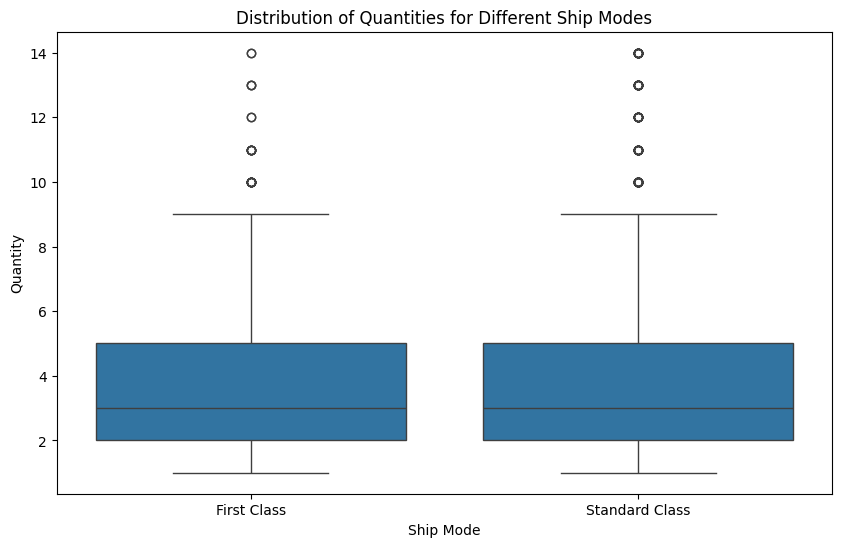

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ship_mode', y='quantity', data=selected_data)
plt.title('Distribution of Quantities for Different Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Quantity')

Text(0, 0.5, 'Count')

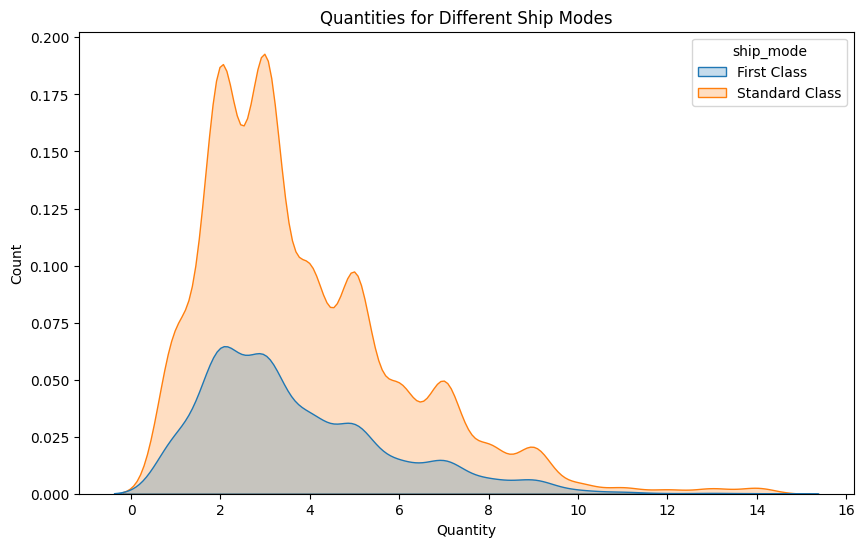

In [87]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=selected_data, x='quantity', hue='ship_mode', fill=True)
plt.title('Quantities for Different Ship Modes')
plt.xlabel('Quantity')
plt.ylabel('Count')

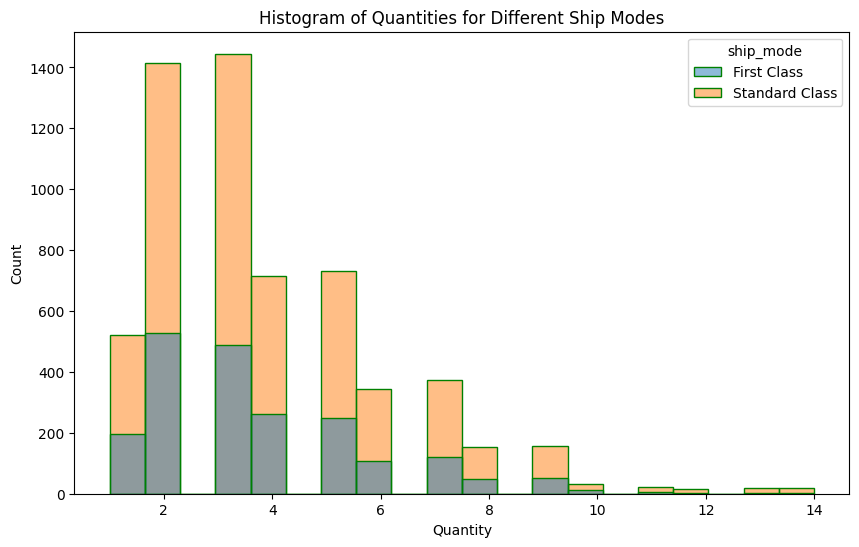

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(data=selected_data, x='quantity', hue='ship_mode', bins=20, edgecolor='green')
plt.title('Histogram of Quantities for Different Ship Modes')
plt.xlabel('Quantity')
plt.ylabel('Count')

plt.show()

In [89]:
selected_ship_modes = ['First Class', 'Standard Class']
selected_data = df[df['ship_mode'].isin(selected_ship_modes)]

group_0 = selected_data[selected_data['ship_mode'] == selected_ship_modes[0]]['discount']
group_1 = selected_data[selected_data['ship_mode'] == selected_ship_modes[1]]['discount']

test_statistic, pvalue = sps.ttest_ind(group_0, group_1)

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {pvalue}')

Test Statistic: 0.21144854602832303
P-value: 0.8325426400367285


## Interpretation:
t
The t-test results indicate that there is no statistically significant difference in discounts between 'First Class' and 'Standard Class'. The positive test statistic suggests a small average difference, but the high p-value suggests that this difference is likely due to random chance rather than a meaningful distinction between the two shipping modes so we fail to reject H0.

Text(0, 0.5, 'Count')

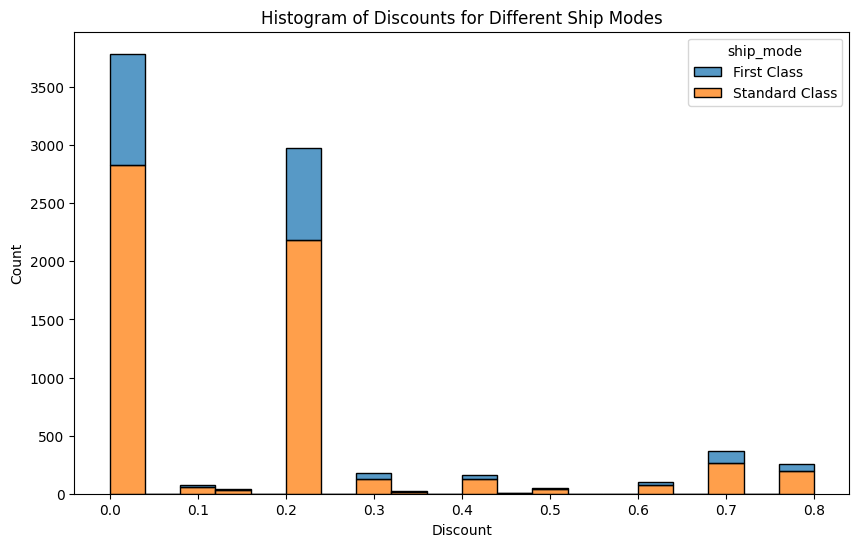

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(data=selected_data, x='discount', hue='ship_mode', multiple='stack', bins=20, edgecolor='black')
plt.title('Histogram of Discounts for Different Ship Modes')
plt.xlabel('Discount')
plt.ylabel('Count')

In [91]:
selected_ship_modes = ['First Class', 'Standard Class']
group_0 = df[df['ship_mode'] == selected_ship_modes[0]]['profit']
group_1 = df[df['ship_mode'] == selected_ship_modes[1]]['profit']

test_statistic, pvalue = sps.ttest_ind(group_0, group_1, equal_var=False)

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {pvalue}')

Test Statistic: 0.6244490818640218
P-value: 0.532371948292163


## Interpretation

The t-test results suggest that there is no statistically significant difference in the mean profit between 'First Class' and 'Standard Class' ship modes. The positive test statistic indicates a small average difference, but the high p-value suggests that this difference is likely due to random variability rather than a meaningful distinction between the two shipping modes so we fail to reject H0.


Text(0, 0.5, 'Profit')

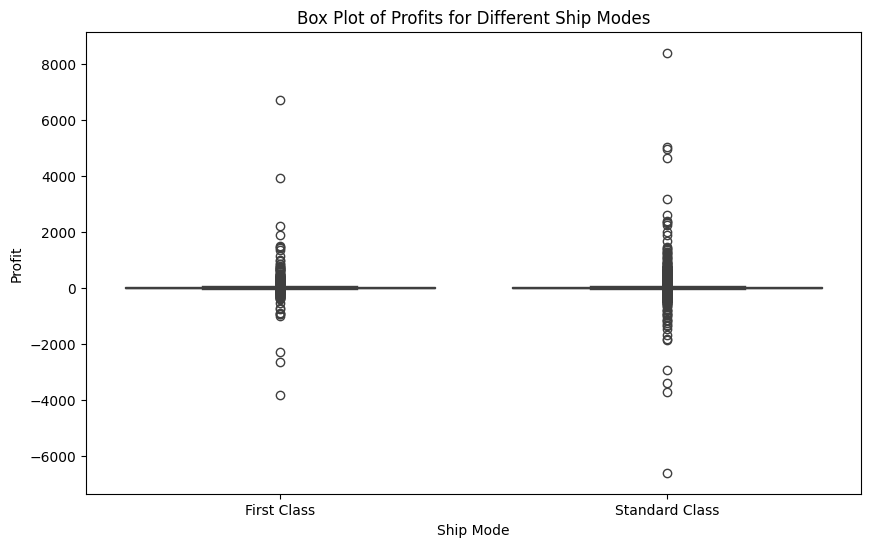

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ship_mode', y='profit', data=selected_data)
plt.title('Box Plot of Profits for Different Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')

In [94]:
from scipy.stats import f_oneway

ship_modes = df['ship_mode'].unique()
data_for_anova = [df[df['ship_mode'] == mode]['profit'] for mode in ship_modes]

test_statistic, pvalue = f_oneway(*data_for_anova)

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {pvalue}')

Test Statistic: 0.2439943655560641
P-value: 0.7834967223858067


 ## Interpretation:
The ANOVA test results suggest that there is no statistically significant difference in the mean profits across different ship modes. The low test statistic and high p-value indicate that the variation in profits can be attributed to random chance rather than a meaningful distinction between the ship modes so we fail to reject H0.

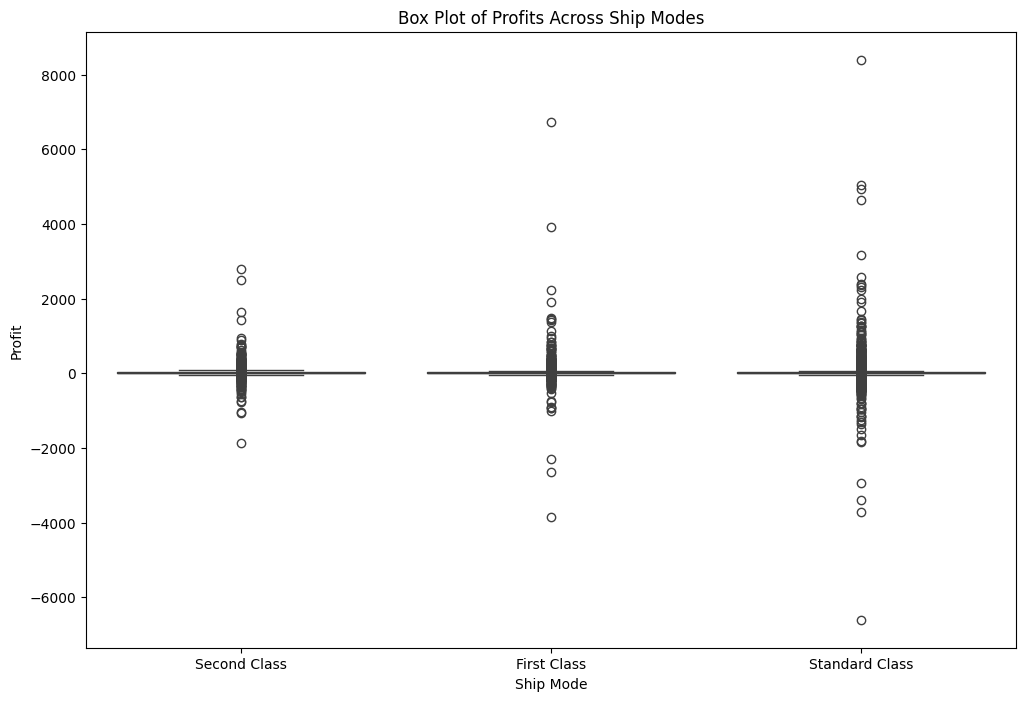

In [95]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ship_mode', y='profit', data=df)
plt.title('Box Plot of Profits Across Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')

plt.show()

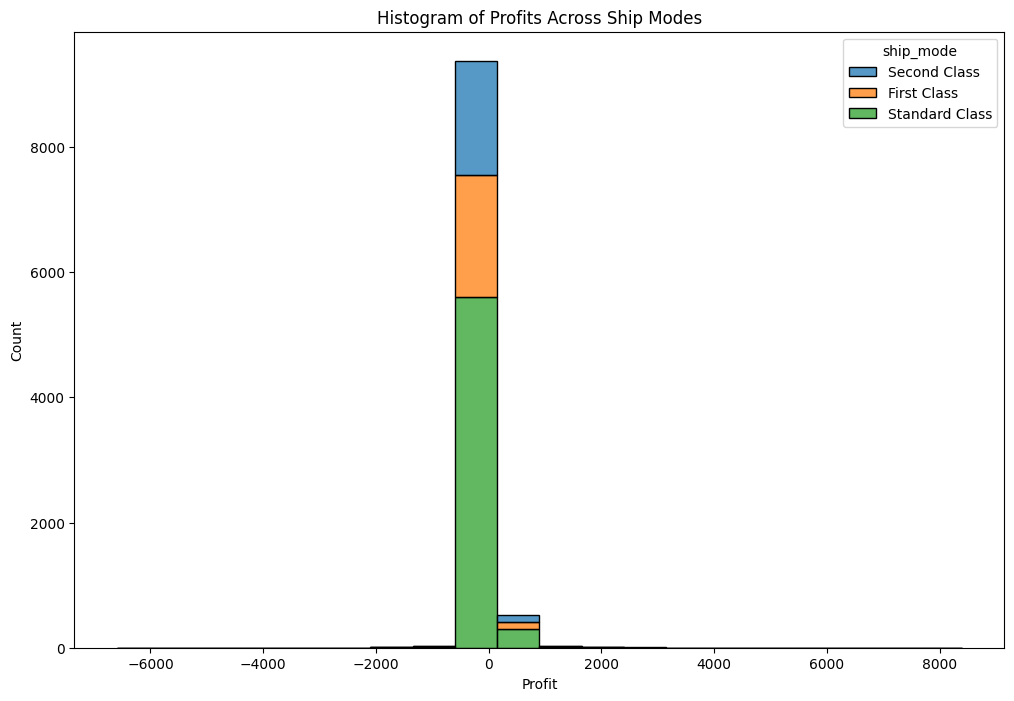

In [96]:

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='profit', hue='ship_mode', multiple='stack', bins=20, edgecolor='black')
plt.title('Histogram of Profits Across Ship Modes')
plt.xlabel('Profit')
plt.ylabel('Count')

plt.show()